# Modeling

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime

In [185]:
#Import the data we created in the first notebook
movements = pd.read_csv('movements_df.csv')

C:\Users\paula\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We want to made a model in order to predict the number of trips per hour and stations. We are going to use ML supervised models



## Preparing data for models

In [186]:
movements['datetime'] = pd.to_datetime(movements['datetime'])
movements['day'] = movements['datetime'].dt.day
movements

,Unnamed: 0,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,...,datetime,date,weekday,hour,month,day,day_week,holiday,type,festivity
0,0,{'$oid': '5ff4ef7c1b913122a89b52eb'},65c85cbd25549e793455e2a82ae80e02713507a7a8729e...,21,1,21,5.100000,33,5,128,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
1,1,{'$oid': '5ff4ef7c1b913122a89b52ed'},9ecabf6d298eec918765e2e8a0e551ee43807c41007ca6...,1,1,15,5.083333,166,3,114,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
2,2,{'$oid': '5ff4ef7c1b913122a89b52f6'},42807c2f5734d476415a4f0e0dcc0242c64097e9329d00...,12,1,23,8.016667,163,4,153,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
3,3,{'$oid': '5ff4ef7c1b913122a89b52f7'},39caf4c36d7b7175aba98e233f33b935c3bd41bff78e54...,17,1,19,6.300000,9,0,198,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
4,4,{'$oid': '5ff4ef7c1b913122a89b52fa'},94afa1ae74054482a0f5219c367c5510b9a5fc720a1efd...,15,1,1,6.350000,9,0,198,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823242,1823242,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,...,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6,30,NaN,NaN,NaN,NaN
1823243,1823243,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,...,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6,30,NaN,NaN,NaN,NaN
1823244,1823244,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,...,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6,29,NaN,NaN,NaN,NaN
1823245,1823245,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,...,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6,27,NaN,NaN,NaN,NaN


#### Division in train and test

We are going to divide the dataset in three subsets: training, validation and test. In order not to distorsionate the results, we are going to do the division by days: 
- Train: from day 1 to 15 th
- Validation: from day 16th to 23 th
- Test: from that 23th on

In [27]:
movements_train = movements[movements['day']<=15]
movements_validation = movements[movements['day']> 15]
movements_test = movements[movements['day']>=24]

In [28]:
movements_train

,Unnamed: 0,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,...,datetime,date,weekday,hour,month,day,day_week,holiday,type,festivity
0,0,{'$oid': '60bbf3f21b91311d90d568ad'},b67ea824acf706087d5818ebc6f90821a5abaab17a0868...,15,1,13,5.316667,38,0,54,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,1,NaN,NaN,NaN,NaN
1,1,{'$oid': '60bbf3f21b91311d90d568b2'},364b1b99f1f9a1748f7abf1134c8d6a46197b583649308...,7,1,1,6.433333,185,0,126,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,1,NaN,NaN,NaN,NaN
2,2,{'$oid': '60bbf3f21b91311d90d568b3'},5cc17031cba02835dda4b6c153b56572beaade54d8ab91...,14,1,10,7.750000,15,0,91,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,1,NaN,NaN,NaN,NaN
3,3,{'$oid': '60bbf3f21b91311d90d568b4'},6e855acaaa17d6d14236598c0f1172c783e16950e39c01...,8,1,22,10.216667,84,0,236,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,1,NaN,NaN,NaN,NaN
4,4,{'$oid': '60bbf3f21b91311d90d568b5'},e93417502d55208995a61f4177956ab9289aba39044ce3...,1,1,4,12.516667,131,5,94,...,2021-06-01 00:00:00+00:00,2021-06-01,Tuesday,0,6,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219386,219386,{'$oid': '60cfbac11b91311a84e293f9'},8209c4f658f34495f3f2c38b15373f08aa62ceb6adad07...,23,1,23,6.833333,260,0,260,...,2021-06-15 19:00:00+00:00,2021-06-15,Tuesday,19,6,15,NaN,NaN,NaN,NaN
228007,228007,{'$oid': '60d10c1e1b91314188688f7b'},25668b9e9c390593fd11d89368c3e4f537a408cbb88378...,1,1,7,4.116667,144,3,258,...,2021-06-15 14:00:00+00:00,2021-06-15,Tuesday,14,6,15,NaN,NaN,NaN,NaN
231246,231246,{'$oid': '60d10c311b91314188689e82'},937822cbdc4eb0c3b5c5ae227778649cc5c41883b6b0a0...,16,1,2,10.616667,78,0,58,...,2021-06-15 05:00:00+00:00,2021-06-15,Tuesday,5,6,15,NaN,NaN,NaN,NaN
234217,234217,{'$oid': '60d25d831b913130ac443736'},4bbde181d71d65c407b97c9744254063ca1430985619f8...,20,1,20,8.416667,221,4,221,...,2021-06-11 18:00:00+00:00,2021-06-11,Friday,18,6,11,NaN,NaN,NaN,NaN


## Models

### ARIMA Model

We are going to use an ARIMA (AutoRegressive Integrated Moving Average) model to predict the demand of bicimad based on historical observations. 

In order to evaluate if it is possible to apply an ARIMA model, we need to ensure that our data is stationary ( the mean, the variance, and the covariance) not depend on time.

As we can see in the plot below our data satifies these conditions

In [187]:
movements_by_hour = movements.groupby(['date', 'weekday', 'hour'])._id.count().reset_index()

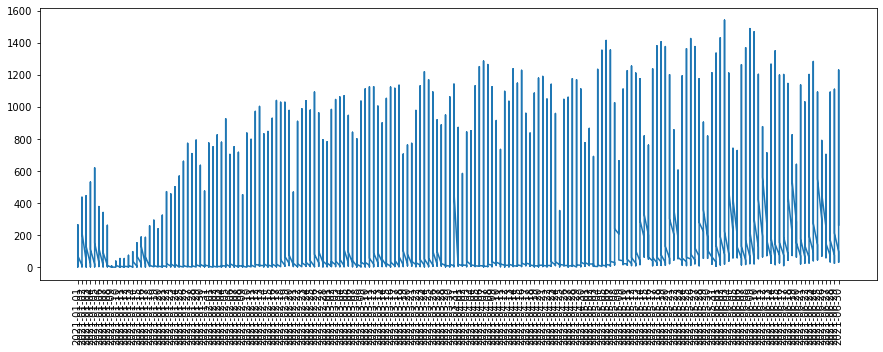

In [188]:
plt.figure(figsize=(15,5))

plt.plot(movements_by_hour['date'], movements_by_hour['_id'])
plt.xticks(rotation=90);

In [189]:
#library statsmodel used for the model

from statsmodels.tsa.arima_model import ARIMA

In our first aproach, we are going to try to predict the demand by day of all the stations, for that we need to have the data grouped by day

In [190]:
movements

,Unnamed: 0,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,...,datetime,date,weekday,hour,month,day,day_week,holiday,type,festivity
0,0,{'$oid': '5ff4ef7c1b913122a89b52eb'},65c85cbd25549e793455e2a82ae80e02713507a7a8729e...,21,1,21,5.100000,33,5,128,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
1,1,{'$oid': '5ff4ef7c1b913122a89b52ed'},9ecabf6d298eec918765e2e8a0e551ee43807c41007ca6...,1,1,15,5.083333,166,3,114,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
2,2,{'$oid': '5ff4ef7c1b913122a89b52f6'},42807c2f5734d476415a4f0e0dcc0242c64097e9329d00...,12,1,23,8.016667,163,4,153,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
3,3,{'$oid': '5ff4ef7c1b913122a89b52f7'},39caf4c36d7b7175aba98e233f33b935c3bd41bff78e54...,17,1,19,6.300000,9,0,198,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
4,4,{'$oid': '5ff4ef7c1b913122a89b52fa'},94afa1ae74054482a0f5219c367c5510b9a5fc720a1efd...,15,1,1,6.350000,9,0,198,...,2021-01-01 00:00:00+00:00,2021-01-01,Friday,0,1,1,viernes,festivo,Festivo nacional,Año Nuevo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823242,1823242,{'$oid': '60e3812c1b9131285030f696'},36d40b49fafe4e7f41919089b609debf52f1ee42f3e752...,14,1,20,14.016667,132,5,265,...,2021-06-30 23:00:00+00:00,2021-06-30,Wednesday,23,6,30,NaN,NaN,NaN,NaN
1823243,1823243,{'$oid': '60e381341b9131285030fefb'},04ea09adba4c3e5e9e9142362b0fca2187530f31834001...,23,1,9,24.666667,182,5,265,...,2021-06-30 21:00:00+00:00,2021-06-30,Wednesday,21,6,30,NaN,NaN,NaN,NaN
1823244,1823244,{'$oid': '60e381351b9131285030ff15'},d26c47762f73fbdca3fefb34830f72f2df1538f9926c73...,22,1,3,12.700000,15,5,265,...,2021-06-29 18:00:00+00:00,2021-06-29,Tuesday,18,6,29,NaN,NaN,NaN,NaN
1823245,1823245,{'$oid': '60e4d2a51b91313ed4f52e62'},45de608bddfda3f468ef6093c65f6246a2917ce2376e98...,23,1,3,12.433333,234,0,84,...,2021-06-27 19:00:00+00:00,2021-06-27,Sunday,19,6,27,NaN,NaN,NaN,NaN


In [191]:
movements_by_hour = movements.groupby(['date', 'weekday', 'hour', 'month'])._id.count().reset_index()

In [192]:
movements_by_hour

,date,weekday,hour,month,_id
0,2021-01-01,Friday,0,1,244
1,2021-01-01,Friday,1,1,25
2,2021-01-01,Friday,2,1,5
3,2021-01-01,Friday,3,1,2
4,2021-01-01,Friday,4,1,10
...,...,...,...,...,...
4313,2021-06-30,Wednesday,19,6,813
4314,2021-06-30,Wednesday,20,6,552
4315,2021-06-30,Wednesday,21,6,571
4316,2021-06-30,Wednesday,22,6,499


To parametrize the model we need three parameters:
- p: number of autoregressive terms
- d: number of nonseasonal differences
- q: number of moving-average terms

First we are going to analyze the autocorrelation plot

In [193]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [194]:
movements_arima = movements_by_hour[['date', '_id']]
movements_arima

,date,_id
0,2021-01-01,244
1,2021-01-01,25
2,2021-01-01,5
3,2021-01-01,2
4,2021-01-01,10
...,...,...
4313,2021-06-30,813
4314,2021-06-30,552
4315,2021-06-30,571
4316,2021-06-30,499


#### Obtaining the d

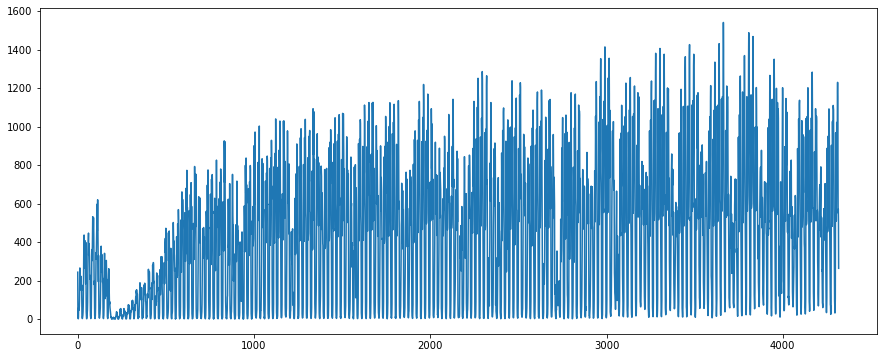

In [195]:
plt.figure(figsize=(15,6))
plt.plot(movements_arima['_id'])

Now, we made the Dickey-Fuller test to prove stationality

In [196]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result_adfuller = adfuller(movements_arima._id)
adf = result_adfuller[0]
pvalue=result_adfuller[1]
print('ADF: ', adf)
print('p-value', pvalue)

ADF:  -4.3417859074967
p-value 0.000375746930661033


Según la prueba de adfuller, si el p valor es menor que 0.05 la serie es estacionaria, nuestro valor es inferior a este numero, por lo que la serie es estacionaria

**d = 0**

#### Obtaining the p

Autocorrelacion parcial

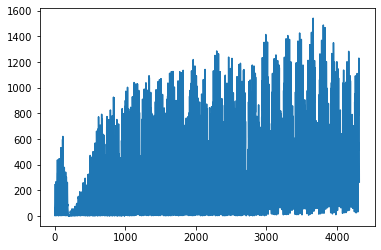

In [197]:
plt.plot(movements_arima._id)

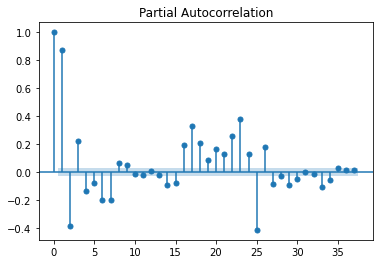

In [201]:
plot_pacf(movements_arima._id)
plt.show()

Vamos a escoger el orden del término AR teniendo en cuenta el corte con el limite de significancia (área azul sombreada) del gráfico pacf, como mínimo tiene que ser uno.
**p = 1**

#### Obtaining q

Autocorrelacion parcial siemple

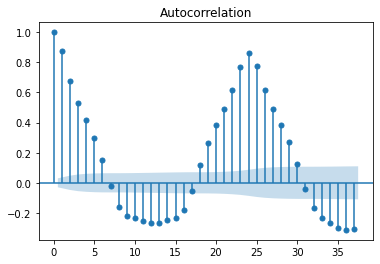

In [200]:
plot_acf(movements_arima._id)
plt.show()

Me quiero quedar con las partes que estan por encima del área sombreado de azul

**q=1**

##### Constructing ARIMA model

In [202]:
from statsmodels.tsa.arima_model import ARIMA

#firt approach d=0 p=1,q=1
arima_model = ARIMA(movements_arima._id, order=(1,0,1))
arima_model_fit = arima_model.fit(disp=0)
arima_model_fit.summary()

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    _id   No. Observations:                 4318
Model:                     ARMA(1, 1)   Log Likelihood              -27847.125
Method:                       css-mle   S.D. of innovations            152.920
Date:                Sat, 02 Apr 2022   AIC                          55702.249
Time:                        20:06:22   BIC                          55727.731
Sample:                             0   HQIC                         55711.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.9986     16.105     26.203      0.000     390.434     453.563
ar.L1._id      0.7789      0.010     76.552      0.000       0.759       0.799
ma.L1._id      0.5312      0.013     41.594      0.000       0.506       0.556
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2838           +0.0000j            1.2838            0.0000
MA.1           -1.8824           +0.0000j            1.8824            0.5000
-----------------------------------------------------------------------------
"""

In [203]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(arima_model_fit.resid, lags=[10],return_df=True)

,lb_stat,lb_pvalue
10,389.50012,1.613572e-77


Como el p_valor es menor que 0.5 el valor no se ajusta bien.

In [204]:
#We iterate with different values por the parameters
p=6
d=0
q=4

from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(movements_arima._id, order=(p,d,q))
arima_model_fit = arima_model.fit(disp=0)
arima_model_fit.summary()
sm.stats.acorr_ljungbox(arima_model_fit.resid, lags=[10],return_df=True)

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


,lb_stat,lb_pvalue
10,167.688816,8.346137e-31


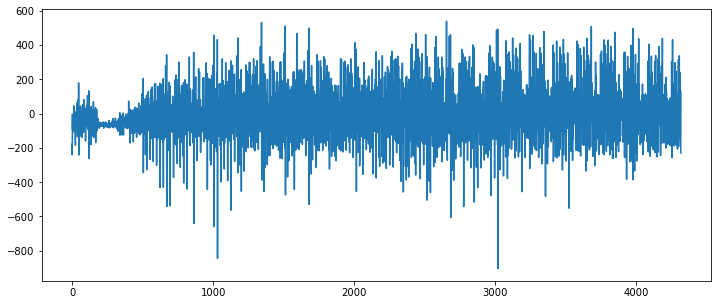

In [205]:
residuals=pd.DataFrame(arima_model_fit.resid)
plt.figure(figsize=(12,5))
plt.plot(residuals)

<Figure size 864x360 with 0 Axes>

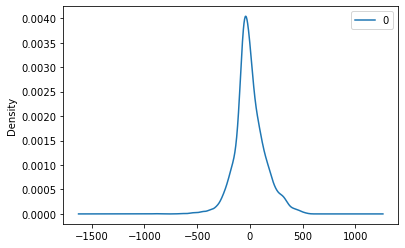

In [206]:
#distribucion
plt.figure(figsize=(12,5))
residuals.plot(kind='kde');

Los errores tienen una distribución normal con una media cercana a 0

Vamos a ver como se ajusta nuestro forecast a los datos

In [80]:
arima_model_fit.plot_predict?

<Figure size 1080x360 with 0 Axes>

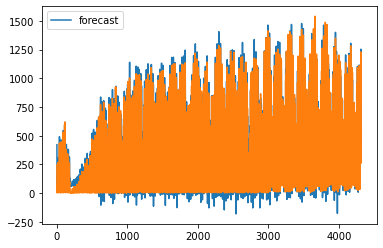

In [207]:
plt.figure(figsize=(15,5))
arima_model_fit.plot_predict(dynamic = False)
plt.show()

Se ajusta bien el forecast a la demanda real. No lo hemos utilizado para predecir el futuro.

Usamos la validación cruzada: busca obtener el valor futuro utilizando los datos existentes

In [95]:
#pip install pmdarima

In [208]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [209]:
X = movements_arima[["_id"]]
X

,_id
0,244
1,25
2,5
3,2
4,10
...,...
4313,813
4314,552
4315,571
4316,499


We split into train and test, we use all the data except the last five rows to train our model and the last 15 days to test the model

In [210]:
x_train, x_test = X[0:-15], X[-15:]

In [211]:
#parameters for the model
p=4
d=0
q=6
model = ARIMA(x_train, order=(p,d,q))
model_fit = model.fit(disp=-1)

C:\Users\paula\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [212]:
#forecast
fc,se,conf=model_fit.forecast(15,alpha=0.05) #95% of confidence

In [213]:
fc_series=pd.Series(fc,x_test.index)
fc_series

4303    490.793345
4304    529.067213
4305    640.121110
4306    758.805289
4307    754.567647
4308    758.279064
4309    810.634048
4310    789.268358
4311    698.693496
4312    641.096118
4313    588.719582
4314    476.691551
4315    359.469722
4316    286.583606
4317    212.192238
dtype: float64

In [214]:
lower_series=pd.Series(conf[:,0], x_test.index)
lower_series

4303    220.925595
4304    119.047339
4305    194.557669
4306    308.328145
4307    303.626092
4308    307.292286
4309    356.406279
4310    332.058378
4311    241.376960
4312    183.509414
4313    129.757401
4314     17.649563
4315    -99.910500
4316   -172.847897
4317   -247.302126
dtype: float64

In [215]:
upper_series=pd.Series(conf[:,1],x_test.index)
upper_series

4303     760.661094
4304     939.087086
4305    1085.684551
4306    1209.282433
4307    1205.509201
4308    1209.265842
4309    1264.861817
4310    1246.478337
4311    1156.010031
4312    1098.682823
4313    1047.681764
4314     935.733539
4315     818.849944
4316     746.015110
4317     671.686602
dtype: float64

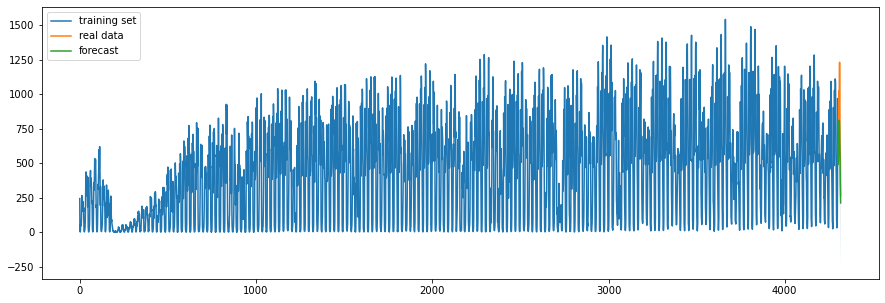

In [216]:
#Results of prediction
plt.figure(figsize=(15,5))
plt.plot(x_train, label='training set')
plt.plot(x_test, label = 'real data')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.legend()
plt.show()

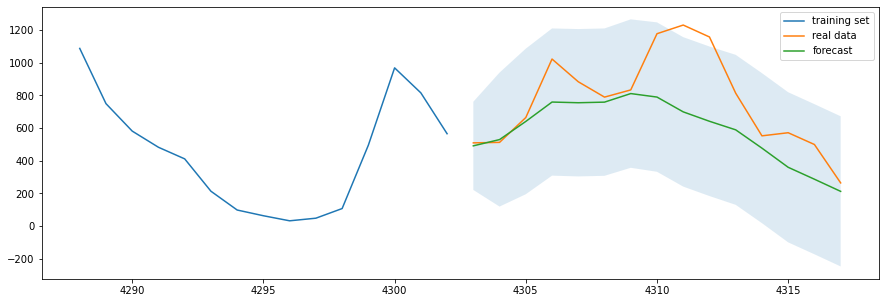

In [218]:
#Focusing on the forecast part
plt.figure(figsize=(15,5))
plt.plot(x_train[-15:], label='training set')
plt.plot(x_test, label = 'real data')
plt.plot(fc_series, label = 'forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.legend()
plt.show()

Todo se encuentra dentro de la banda de confianza, aunque hay zonas que hemos pronosticado que estan por debajo de la demanda real

#### Metricas

In [219]:
from sklearn import metrics

In [220]:
#mean absolute percentage error
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [221]:
def calculate_metrics(fc,x_test):
    mse = metrics.mean_squared_error(fc,x_test)
    mae = metrics.mean_absolute_error(fc,x_test)
    rmse = np.sqrt(metrics.mean_squared_error(fc,x_test))
    mape = mape(fc,x_test)
    r2 = metrics.r2_score(fc,x_test)

In [222]:
evaluation_models = pd.DataFrame(columns=["model", "MSE", "MAE", "RMSE", "MAPE", "R2"])

In [223]:
evaluation_models.append({'model':'ARIMA', 'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2':r2}, ignore_index=True)

,model,MSE,MAE,RMSE,MAPE,R2
0,ARIMA,26006.694617,107.233989,161.265913,<function mape at 0x000001FA4F378280>,0.27175


#### Autoarima

In [224]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

We construct the auto arima model, with test adf, to find the optimal d, we set the p and q betweet 1 and 5, the frequency as 1.
The auto arima model return the best model

In [225]:
auto_arima_model = pm.auto_arima(movements_arima._id, start_p=1,start_q=1,
                                test = 'adf', max_p=5, max_q=5,
                                m=1,d=None, seasonal = False, start_P=0,
                                D=0, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=55986.405, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=66767.425, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=56813.068, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61908.789, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=55983.713, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=56304.622, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=55919.108, Time=0.43 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=55943.284, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=55906.189, Time=0.97 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=55918.333, Time=0.16 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=55864.861, Time=2.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=55919.284, Time=0.20 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=55709.480, Time=2.45 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=55860.281, Time=1.91 sec
 ARIMA(5,0,3)(0,0,0

In [226]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4318
Model:               SARIMAX(5, 0, 4)   Log Likelihood              -27616.652
Date:                Sat, 02 Apr 2022   AIC                          55255.305
Time:                        20:08:54   BIC                          55325.381
Sample:                             0   HQIC                         55280.049
                               - 4318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.7751     13.778      5.064      0.000      42.771      96.779
ar.L1          2.0715      0.176     11.763      0.000       1.726       2.417
ar.L2         -2.0218      0.381     -5.307      0.000      -2.769      -1.275
ar.L3          0.8068      0.427      1.888      0.059      -0.031       1.644
ar.L4          0.1860      0.253      0.736      0.462      -0.309       0.681
ar.L5         -0.1988      0.061     -3.237      0.001      -0.319      -0.078
ma.L1         -0.8230      0.178     -4.616      0.000      -1.173      -0.474
ma.L2          0.4039      0.161      2.508      0.012       0.088       0.720
ma.L3          0.4983      0.119      4.180      0.000       0.265       0.732
ma.L4         -0.1618      0.055     -2.961      0.003      -0.269      -0.055
sigma2      2.218e+04    413.631     53.621      0.000    2.14e+04     2.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               752.00
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

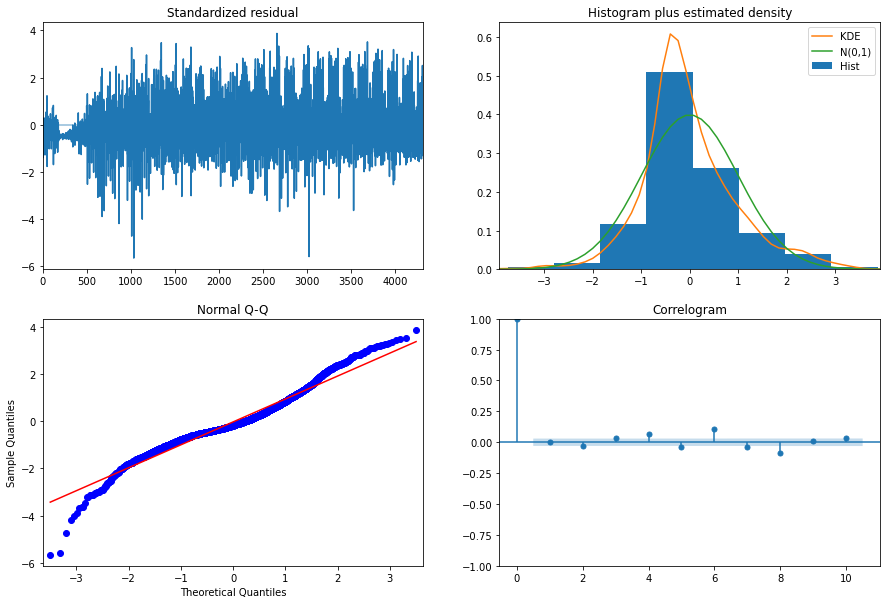

In [227]:
auto_arima_model.plot_diagnostics(figsize=(15,10))
plt.show()

1. First plot (standardized residual):the residual errors fluctuate around 0, uniformed variance
2. Second plot (histogram): Distribution with mean 0, the orange line is the density
3. Third plot (normal Q-Q): hay sesgo, para que no haya sesgo los puntos tienen que seguir la linea roja
4. Fouth plot (correlogram or ACF)

In [229]:
#Forecast
n_periods=24
forecast, confidence_interval = auto_arima_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_forecast = np.arange(len(movements_arima._id), len(movements_arima._id)+n_periods)

In [230]:
fc_series = pd.Series(forecast, index = index_of_forecast)
lower_series= pd.Series(confidence_interval[:,0], index = index_of_forecast)
upper_series = pd.Series(confidence_interval[:,1], index = index_of_forecast)

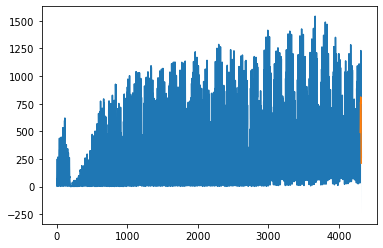

In [228]:
plt.plot(movements_arima._id)
plt.plot(fc_series)
plt.fill_between(lower_series.index, lower_series, upper_series, alpha=.15)
plt.show()

#### Arima part 2